In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
data2101 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202101.csv', index_col=False)

In [3]:
data2101.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210101,일산선,백석,2724,2825,20210104
1,20210101,일산선,마두,1638,1652,20210104
2,20210101,3호선,을지로3가,1024,1009,20210104
3,20210101,3호선,종로3가,1255,1632,20210104
4,20210101,3호선,안국,2934,3029,20210104


In [4]:
data2101.drop(['등록일자'], axis=1, inplace=True)

In [5]:
data2101.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210101,일산선,백석,2724,2825
1,20210101,일산선,마두,1638,1652
2,20210101,3호선,을지로3가,1024,1009
3,20210101,3호선,종로3가,1255,1632
4,20210101,3호선,안국,2934,3029


In [6]:
data2101.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18537 entries, 0 to 18536
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18537 non-null  int64 
 1   노선명     18537 non-null  object
 2   역명      18537 non-null  object
 3   승차총승객수  18537 non-null  int64 
 4   하차총승객수  18537 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 724.2+ KB


In [7]:
data2101.describe()

,사용일자,승차총승객수,하차총승객수
count,1.853700e+04,18537.000000,18537.000000
mean,2.021012e+07,7697.116793,7669.993742
std,8.944564e+00,8116.260281,8135.399150
min,2.021010e+07,1.000000,0.000000
25%,2.021011e+07,2346.000000,2318.000000
50%,2.021012e+07,5223.000000,5133.000000
75%,2.021012e+07,10124.000000,10042.000000
max,2.021013e+07,77789.000000,75670.000000


In [8]:
data2101.isnull().sum()

사용일자      0
노선명       0
역명        0
승차총승객수    0
하차총승객수    0
dtype: int64

In [9]:
data2101['유동인구'] = data2101['승차총승객수'] + data2101['하차총승객수']

In [10]:
date = pd.to_datetime(data2101.사용일자, format='%Y%m%d')
date

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
18532   2021-01-31
18533   2021-01-31
18534   2021-01-31
18535   2021-01-31
18536   2021-01-31
Name: 사용일자, Length: 18537, dtype: datetime64[ns]

In [11]:
data2101['year'] = date.dt.year
data2101['month'] = date.dt.month
data2101['day'] = date.dt.day
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
data2101['wday'] = date.dt.dayofweek.map(wday)

In [12]:
data2101.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,유동인구,year,month,day,wday
0,20210101,일산선,백석,2724,2825,5549,2021,1,1,금
1,20210101,일산선,마두,1638,1652,3290,2021,1,1,금
2,20210101,3호선,을지로3가,1024,1009,2033,2021,1,1,금
3,20210101,3호선,종로3가,1255,1632,2887,2021,1,1,금
4,20210101,3호선,안국,2934,3029,5963,2021,1,1,금


In [13]:
print(data2101.iloc[data2101['유동인구'].idxmax()], data2101.iloc[data2101['승차총승객수'].idxmax()], data2101.iloc[data2101['하차총승객수'].idxmax()])

사용일자      20210129
노선명            2호선
역명              강남
승차총승객수       77789
하차총승객수       75670
유동인구        153459
year          2021
month            1
day             29
wday             금
Name: 16781, dtype: object 사용일자      20210129
노선명            2호선
역명              강남
승차총승객수       77789
하차총승객수       75670
유동인구        153459
year          2021
month            1
day             29
wday             금
Name: 16781, dtype: object 사용일자      20210129
노선명            2호선
역명              강남
승차총승객수       77789
하차총승객수       75670
유동인구        153459
year          2021
month            1
day             29
wday             금
Name: 16781, dtype: object


In [14]:
data2101['노선명'].value_counts().sort_index()

1호선          310
2호선         1550
3호선         1039
4호선          806
5호선         1643
6호선         1167
7호선         1581
8호선          527
9호선          775
9호선2~3단계     403
경강선          341
경부선         1209
경원선          907
경의선          812
경인선          620
경춘선          589
공항철도 1호선     434
과천선          248
분당선         1063
수인선          558
안산선          403
우이신설선        403
일산선          312
장항선          186
중앙선          651
Name: 노선명, dtype: int64

In [15]:
data2101.groupby('노선명')['승차총승객수', '하차총승객수', '유동인구'].mean()

,승차총승객수,하차총승객수,유동인구
노선명,,,
1호선,14739.400000,14235.587097,28974.987097
2호선,18115.266452,18209.261935,36324.528387
3호선,10279.015399,10205.513956,20484.529355
4호선,12439.279156,12513.725806,24953.004963
5호선,7911.231893,7881.703591,15792.935484
6호선,5791.519280,5727.289632,11518.808912
7호선,9434.485769,9319.827324,18754.313093
8호선,7886.609108,7940.519924,15827.129032
9호선,7168.596129,7238.712258,14407.308387


In [16]:
data2101.groupby('노선명')['승차총승객수', '하차총승객수', '유동인구'].sum()

,승차총승객수,하차총승객수,유동인구
노선명,,,
1호선,4569214,4413032,8982246
2호선,28078663,28224356,56303019
3호선,10679897,10603529,21283426
4호선,10026059,10086063,20112122
5호선,12998154,12949639,25947793
6호선,6758703,6683747,13442450
7호선,14915922,14734647,29650569
8호선,4156243,4184654,8340897
9호선,5555662,5610002,11165664


In [17]:
data2101.drop_duplicates('역명').groupby('노선명')['역명'].count()

노선명
1호선          7
2호선         49
3호선         31
4호선         22
5호선         46
6호선         29
7호선         44
8호선         14
9호선         20
9호선2~3단계    10
경강선         11
경부선         34
경원선         23
경의선         20
경인선         19
경춘선         19
공항철도 1호선     8
과천선          8
분당선         26
수인선         17
안산선         13
우이신설선       10
일산선         10
장항선          6
중앙선         21
Name: 역명, dtype: int64

In [18]:
data2101.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,유동인구,year,month,day,wday
0,20210101,일산선,백석,2724,2825,5549,2021,1,1,금
1,20210101,일산선,마두,1638,1652,3290,2021,1,1,금
2,20210101,3호선,을지로3가,1024,1009,2033,2021,1,1,금
3,20210101,3호선,종로3가,1255,1632,2887,2021,1,1,금
4,20210101,3호선,안국,2934,3029,5963,2021,1,1,금


In [19]:
dt = pd.to_datetime(data2101.사용일자, format='%Y%m%d')
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
plot_data = data2101.groupby(['노선명', dt.dt.dayofweek])['승차총승객수'].mean().unstack()

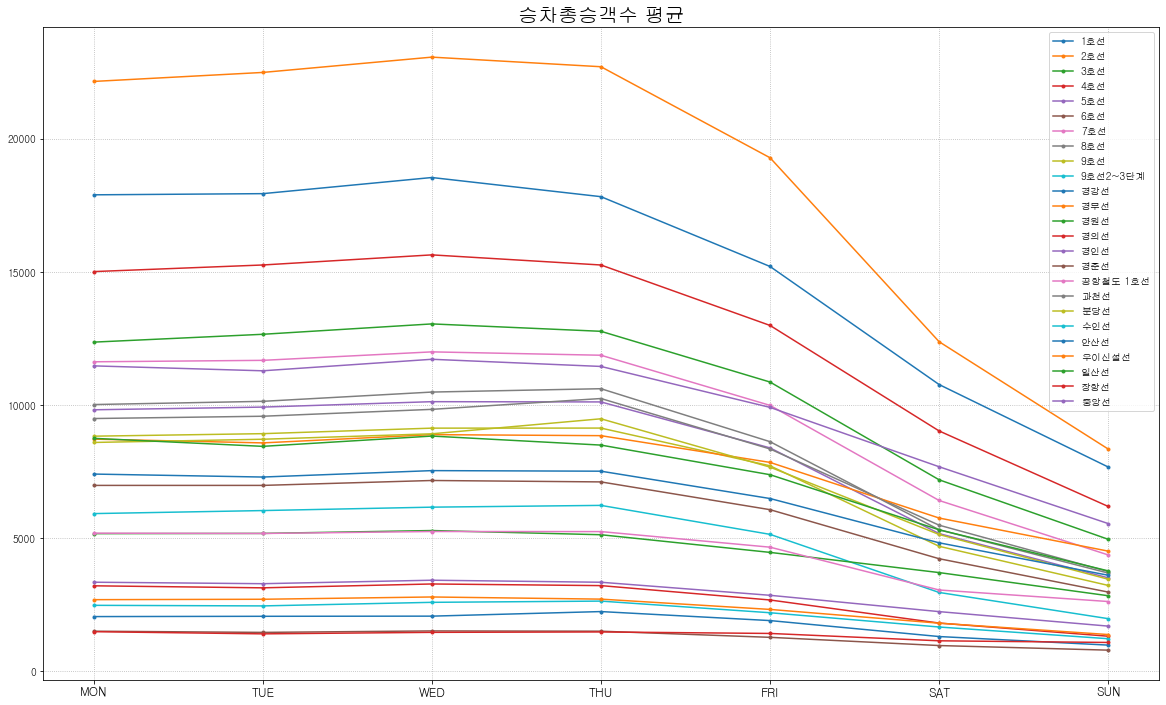

In [20]:
import matplotlib.font_manager as fm
from matplotlib import rc  
rc('font', family='gulim') 		
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
ax.set_xticklabels(['','MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], fontsize=12)
plt.legend(plot_data.index.tolist())
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('승차총승객수 평균', fontsize=20)
plt.show()

In [21]:
dt = pd.to_datetime(data2101.사용일자, format='%Y%m%d')
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
plot_data = data2101.groupby(['노선명', dt.dt.dayofweek])['승차총승객수'].sum().unstack()

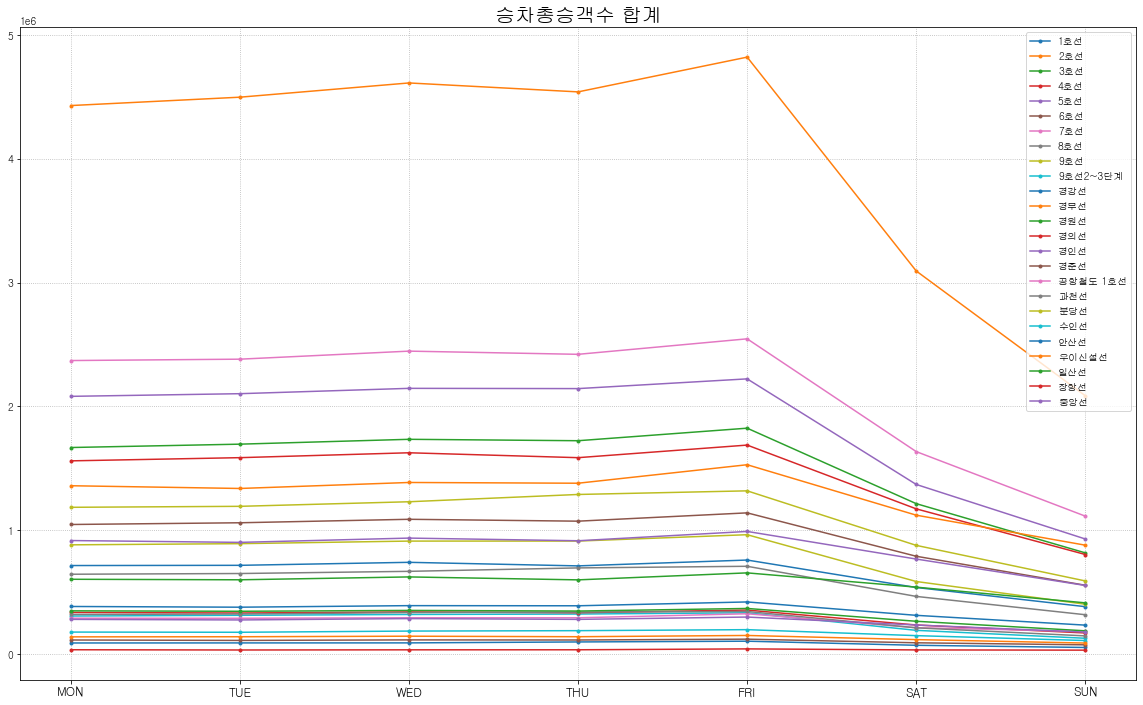

In [22]:
import matplotlib.font_manager as fm
from matplotlib import rc  
rc('font', family='gulim') 		
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
ax.set_xticklabels(['','MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], fontsize=12)
plt.legend(plot_data.index.tolist())
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('승차총승객수 합계', fontsize=20)
plt.show()

In [23]:
dt = pd.to_datetime(data2101.사용일자, format='%Y%m%d')
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
plot_data = data2101.groupby(['노선명', dt.dt.dayofweek])['유동인구'].mean().unstack()

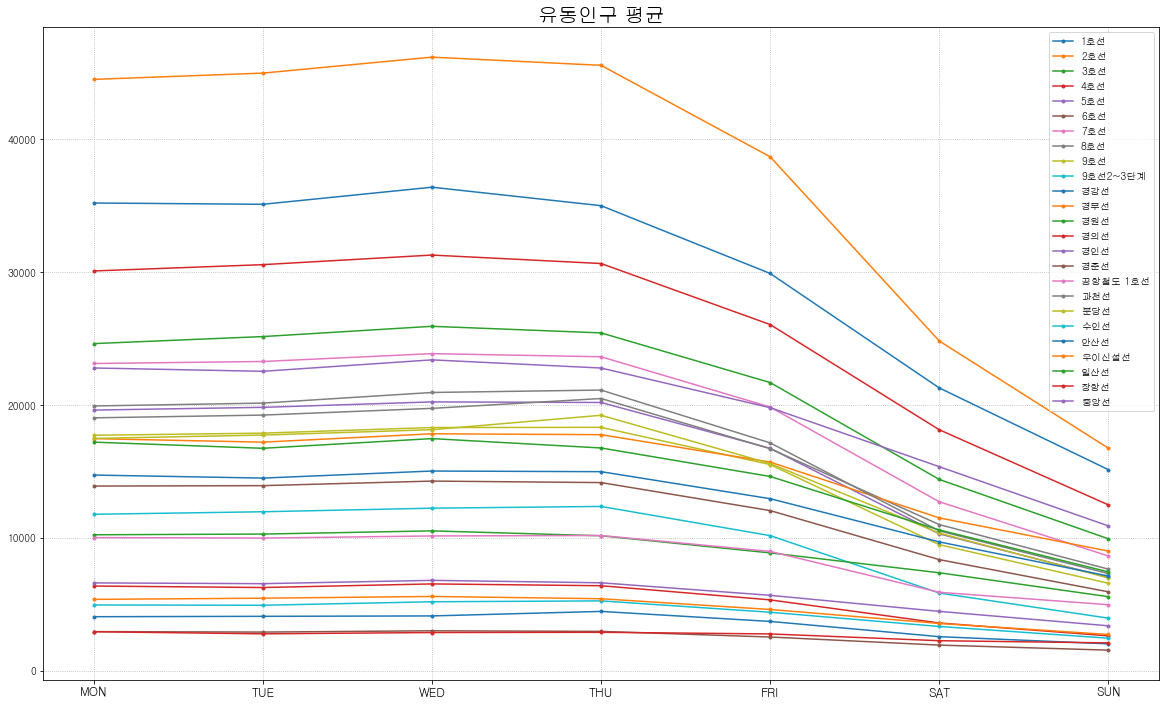

In [24]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
ax.set_xticklabels(['','MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], fontsize=12)
plt.legend(plot_data.index.tolist(), prop=prop)
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('유동인구 평균', fontsize=20)
plt.show()

In [25]:
plot_data = data2101.groupby(['노선명', dt.dt.dayofweek])['유동인구'].sum().unstack()

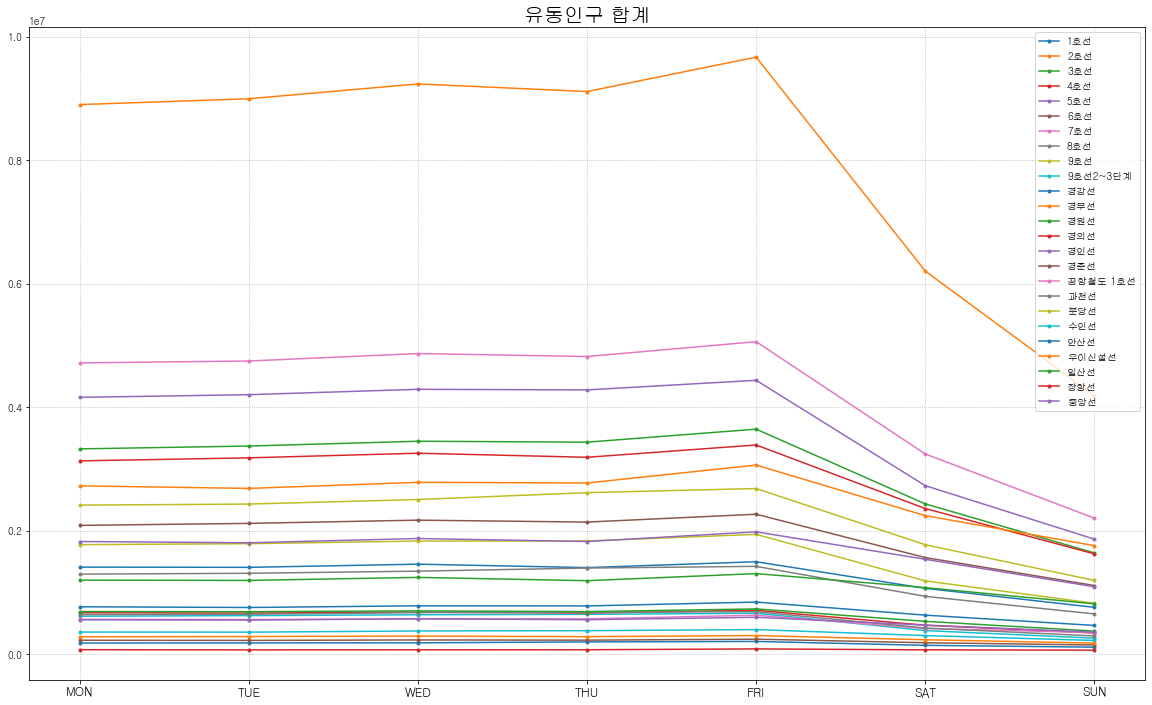

In [26]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
ax.set_xticklabels(['','MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], fontsize=12)
plt.legend(plot_data.index.tolist(), prop=prop)
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('유동인구 합계', fontsize=20)
plt.show()

In [27]:
plot_data = data2101.groupby(['노선명', dt.dt.day])['유동인구'].mean().unstack()

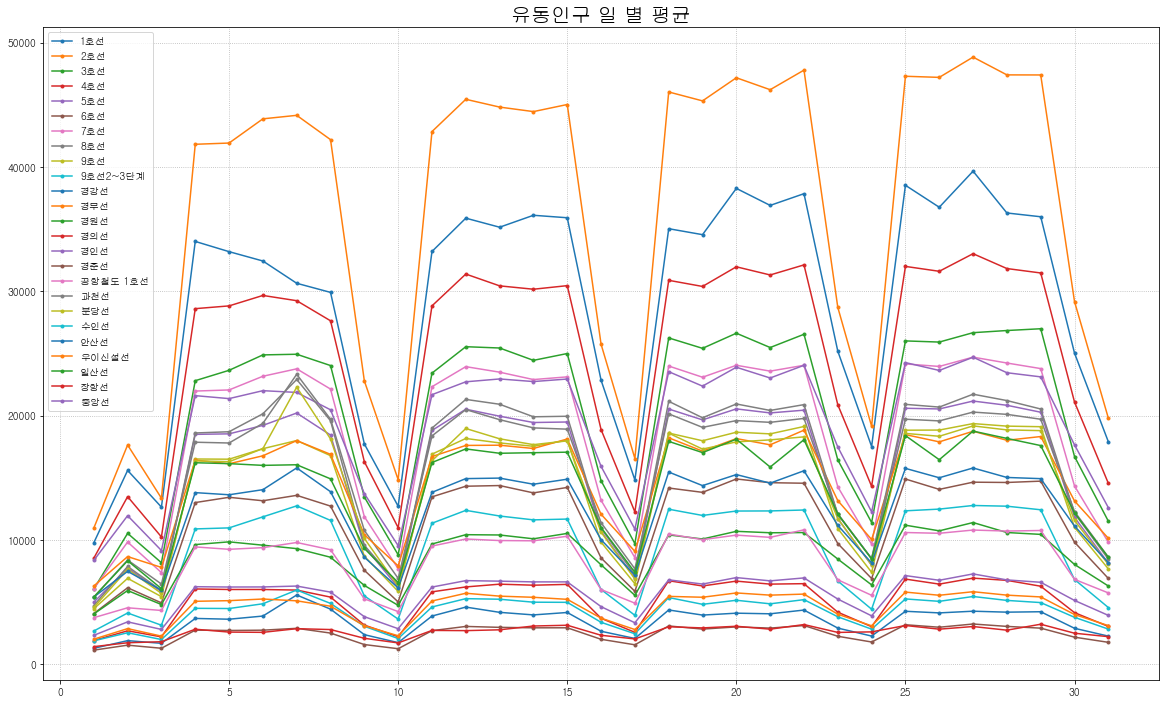

In [28]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
plt.legend(plot_data.index.tolist(), prop=prop)
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('유동인구 일 별 평균', fontsize=20)
plt.show()

In [29]:
plot_data = data2101.groupby(['노선명', dt.dt.day])['유동인구'].sum().unstack()

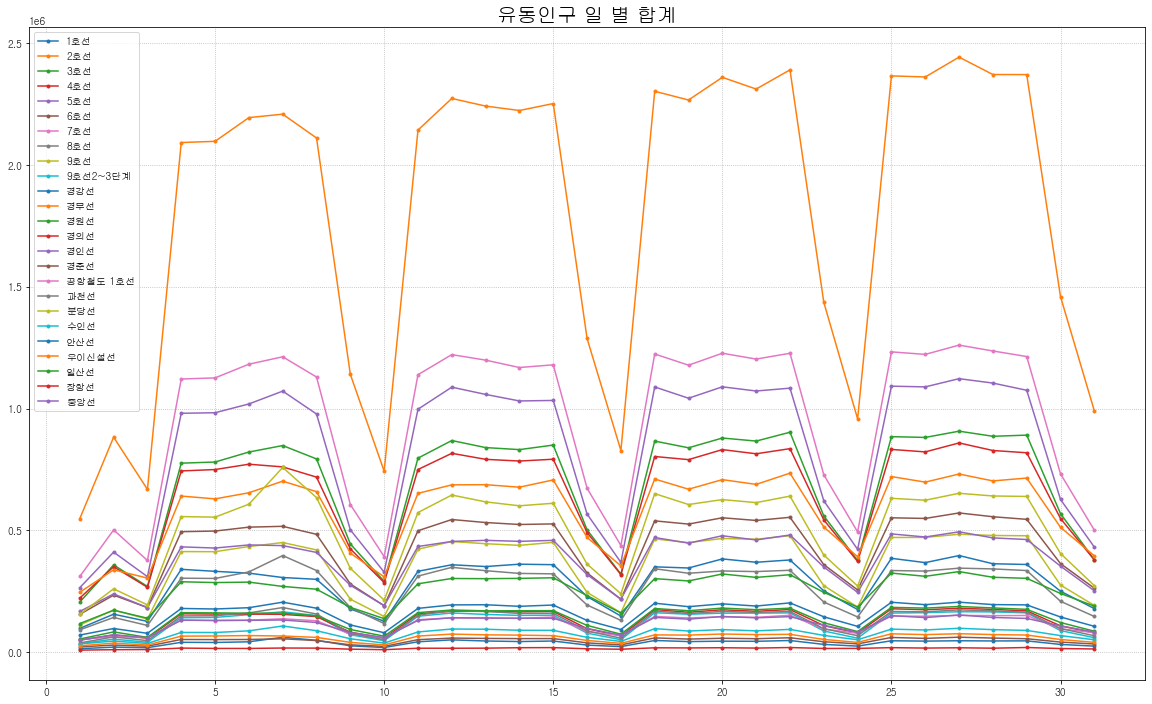

In [30]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
plt.legend(plot_data.index.tolist(), prop=prop)
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('유동인구 일 별 합계', fontsize=20)
plt.show()

In [31]:
# import glob
# path = r'.\data\seoul_subway'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=False)
#     li.append(df)

In [32]:
data2101 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202101.csv', index_col=False)
data2102 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202102.csv', index_col=False)
data2103 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202103.csv', index_col=False)
data2104 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202104.csv', index_col=False)
data2105 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202105.csv', index_col=False)
data2106 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202106.csv', index_col=False)
data2107 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202107.csv', index_col=False)
data2108 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202108.csv', index_col=False)
data2109 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202109.csv', index_col=False)
data2110 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202110.csv', index_col=False)
data2111 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202111.csv', encoding='cp949',index_col=False)
data2112 = pd.read_csv('./data/seoul_subway/CARD_SUBWAY_MONTH_202112.csv', index_col=False)

In [33]:
data2101.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210101,일산선,백석,2724,2825,20210104
1,20210101,일산선,마두,1638,1652,20210104
2,20210101,3호선,을지로3가,1024,1009,20210104
3,20210101,3호선,종로3가,1255,1632,20210104
4,20210101,3호선,안국,2934,3029,20210104


In [34]:
data2111.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20211101,1호선,동대문,10855,10327,20211104
1,20211101,1호선,신설동,13933,13614,20211104
2,20211101,1호선,제기동,17584,17948,20211104
3,20211101,1호선,청량리(서울시립대입구),19604,19787,20211104
4,20211101,2호선,시청,23006,22704,20211104


In [35]:
all_df = pd.concat([data2101,data2102,data2103,data2104,data2105,data2106,data2107,data2108,data2109,data2110,data2111,data2112])

In [36]:
all_df.shape

(219279, 6)

In [37]:
all_df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210101,일산선,백석,2724,2825,20210104
1,20210101,일산선,마두,1638,1652,20210104
2,20210101,3호선,을지로3가,1024,1009,20210104
3,20210101,3호선,종로3가,1255,1632,20210104
4,20210101,3호선,안국,2934,3029,20210104


In [38]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219279 entries, 0 to 18686
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용일자    219279 non-null  int64 
 1   노선명     219279 non-null  object
 2   역명      219279 non-null  object
 3   승차총승객수  219279 non-null  int64 
 4   하차총승객수  219279 non-null  int64 
 5   등록일자    219279 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 11.7+ MB


In [39]:
date = pd.to_datetime(all_df.사용일자, format='%Y%m%d')
date

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
18682   2021-12-31
18683   2021-12-31
18684   2021-12-31
18685   2021-12-31
18686   2021-12-31
Name: 사용일자, Length: 219279, dtype: datetime64[ns]

In [40]:
all_df['유동인구'] = all_df['승차총승객수'] + all_df['하차총승객수']

In [41]:
all_df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,유동인구
0,20210101,일산선,백석,2724,2825,20210104,5549
1,20210101,일산선,마두,1638,1652,20210104,3290
2,20210101,3호선,을지로3가,1024,1009,20210104,2033
3,20210101,3호선,종로3가,1255,1632,20210104,2887
4,20210101,3호선,안국,2934,3029,20210104,5963


In [42]:
all_df['year'] = date.dt.year
all_df['month'] = date.dt.month
all_df['day'] = date.dt.day
all_df['dayofweek'] = date.dt.dayofweek
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
all_df['wday'] = date.dt.dayofweek.map(wday)

In [43]:
all_df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,유동인구,year,month,day,dayofweek,wday
0,20210101,일산선,백석,2724,2825,20210104,5549,2021,1,1,4,금
1,20210101,일산선,마두,1638,1652,20210104,3290,2021,1,1,4,금
2,20210101,3호선,을지로3가,1024,1009,20210104,2033,2021,1,1,4,금
3,20210101,3호선,종로3가,1255,1632,20210104,2887,2021,1,1,4,금
4,20210101,3호선,안국,2934,3029,20210104,5963,2021,1,1,4,금


In [44]:
dt = pd.to_datetime(all_df.사용일자, format='%Y%m%d')
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
plot_data = all_df.groupby(['노선명', dt.dt.dayofweek])['유동인구'].mean().unstack()

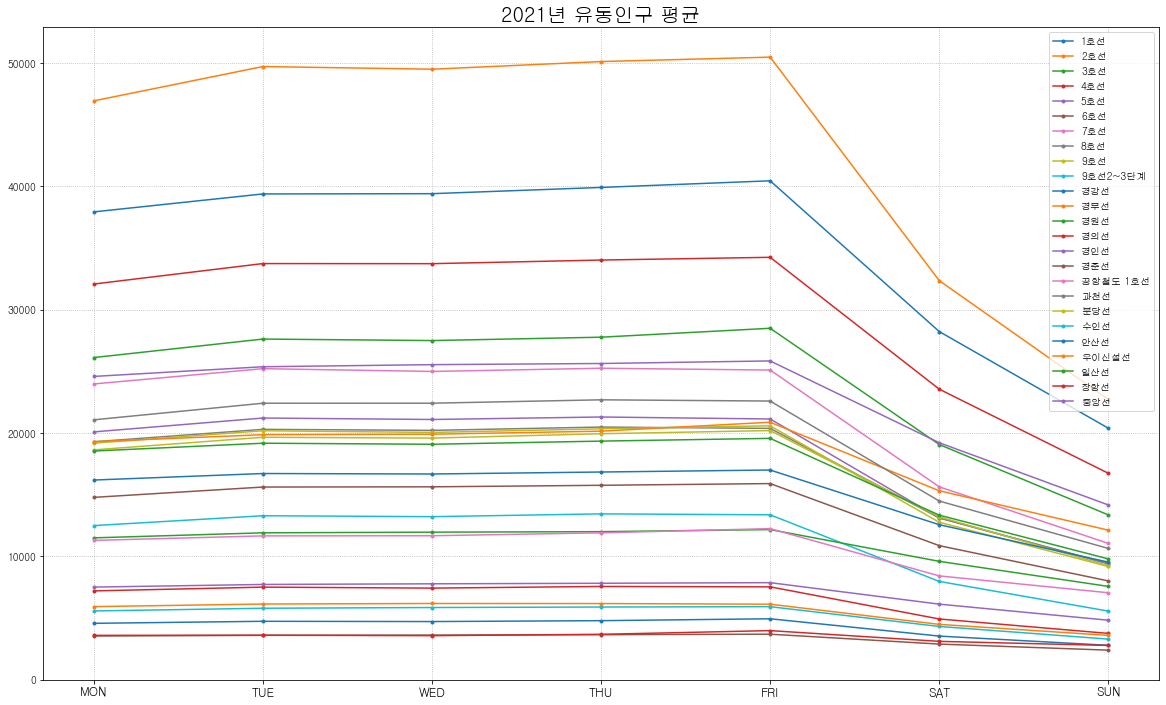

In [45]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
ax.set_xticklabels(['','MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], fontsize=12)
plt.legend(plot_data.index.tolist(), prop=prop)
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('2021년 유동인구 평균', fontsize=20)
plt.show()

In [46]:
dt = pd.to_datetime(all_df.사용일자, format='%Y%m%d')
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
plot_data = all_df.groupby(['노선명', dt.dt.dayofweek])['유동인구'].sum().unstack()

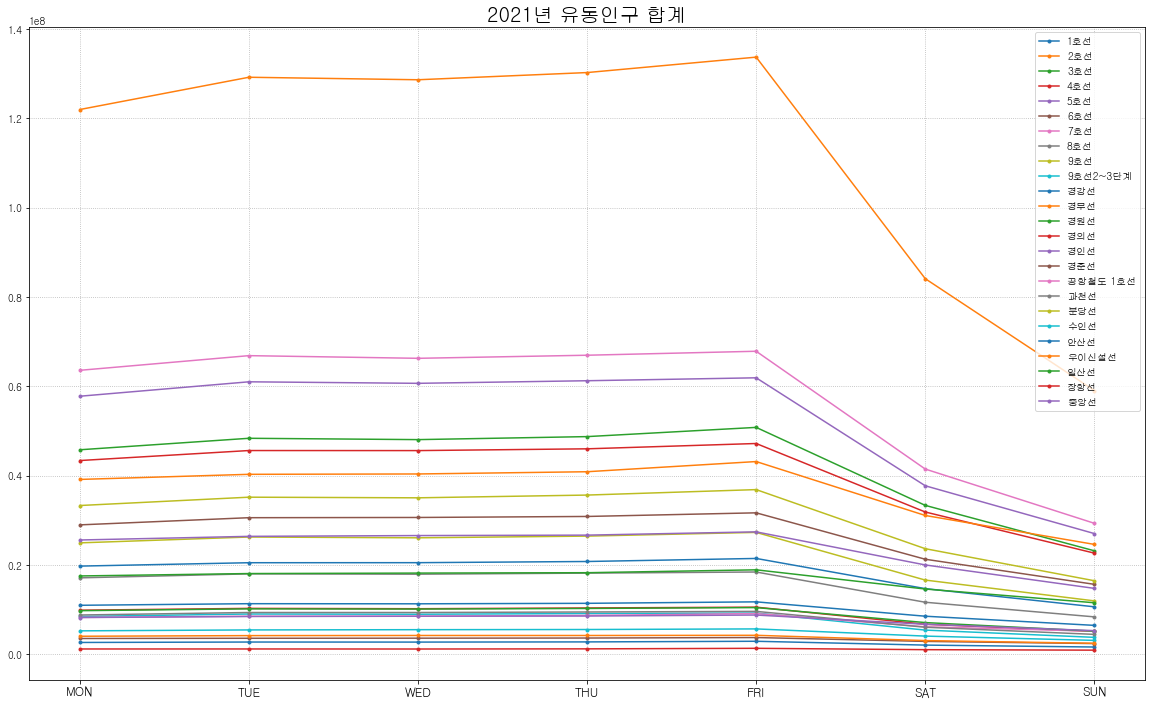

In [47]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_data.T, marker=".")
ax.set_xticklabels(['','MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], fontsize=12)
plt.legend(plot_data.index.tolist(), prop=prop)
plt.grid(True, linestyle = ':')
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] =False
plt.title('2021년 유동인구 합계', fontsize=20)
plt.show()

In [48]:
# 2호선 데이터만 추출
data_2ho = all_df[all_df['노선명']=='2호선']
data_2ho.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,유동인구,year,month,day,dayofweek,wday
45,20210101,2호선,용두(동대문구청),614,625,20210104,1239,2021,1,1,4,금
46,20210101,2호선,신정네거리,2297,2428,20210104,4725,2021,1,1,4,금
47,20210101,2호선,양천구청,1440,1497,20210104,2937,2021,1,1,4,금
48,20210101,2호선,도림천,235,244,20210104,479,2021,1,1,4,금
49,20210101,2호선,신설동,1008,924,20210104,1932,2021,1,1,4,금


In [49]:
group_2ho = data_2ho.groupby(['사용일자', '노선명'])['유동인구'].sum().reset_index()

In [50]:
group_2ho.reset_index()

,index,사용일자,노선명,유동인구
0,0,20210101,2호선,548194
1,1,20210102,2호선,882231
2,2,20210103,2호선,668287
3,3,20210104,2호선,2091433
4,4,20210105,2호선,2096391
...,...,...,...,...
360,360,20211227,2호선,2432726
361,361,20211228,2호선,2555435
362,362,20211229,2호선,2624079
363,363,20211230,2호선,2588354


In [51]:
date = pd.to_datetime(group_2ho.사용일자, format='%Y%m%d')
date

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
360   2021-12-27
361   2021-12-28
362   2021-12-29
363   2021-12-30
364   2021-12-31
Name: 사용일자, Length: 365, dtype: datetime64[ns]

In [52]:
group_2ho['year'] = date.dt.year
group_2ho['month'] = date.dt.month
group_2ho['day'] = date.dt.day
group_2ho['dayofweek'] = date.dt.dayofweek
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
group_2ho['wday'] = date.dt.dayofweek.map(wday)

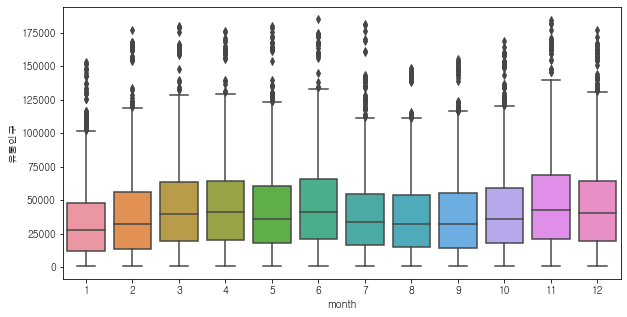

In [55]:
import seaborn as sns
a, b = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(data_2ho['month'],data_2ho['유동인구'])
plt.show()

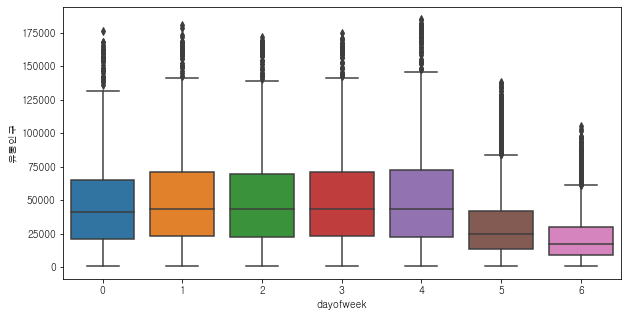

In [56]:
import seaborn as sns
a, b = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(data_2ho['dayofweek'],data_2ho['유동인구'])
plt.show()

In [59]:
group_2ho['date'] = date

In [61]:
group_2ho.head()

,사용일자,노선명,유동인구,year,month,day,dayofweek,wday,date
0,20210101,2호선,548194,2021,1,1,4,금,2021-01-01
1,20210102,2호선,882231,2021,1,2,5,토,2021-01-02
2,20210103,2호선,668287,2021,1,3,6,일,2021-01-03
3,20210104,2호선,2091433,2021,1,4,0,월,2021-01-04
4,20210105,2호선,2096391,2021,1,5,1,화,2021-01-05


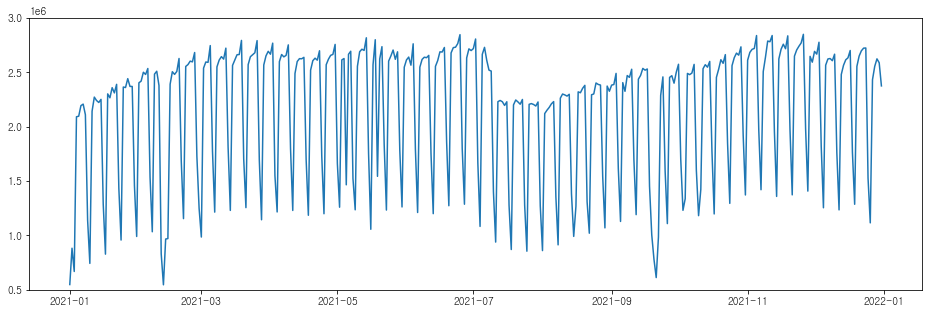

In [67]:
a, b = plt.subplots(1,1,figsize=(16,5))
plt.plot(group_2ho['date'], group_2ho['유동인구'])
plt.ylim([500000, 3000000])
plt.show()